In [1]:
from mplsoccer import Pitch, FontManager, Sbopen, VerticalPitch
import numpy as np
from matplotlib.colors import to_rgba
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
# Poland vs Argentina
MATCH_ID = 3857264
TEAM = 'Poland'
parser = Sbopen()
events, related, freeze, players = parser.event(MATCH_ID)

In [9]:
events

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,dribble_overrun,ball_recovery_offensive,substitution_replacement_id,substitution_replacement_name,pass_goal_assist,foul_committed_card_id,foul_committed_card_name,pass_no_touch,dribble_nutmeg,block_save_block
0,bad01947-5491-406e-bbe9-2a146161aa70,1,1,00:00:00,0,0,1,0.000000,3857264,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5b336aa1-8a01-4877-916f-4087379ac7bb,2,1,00:00:00,0,0,1,0.000000,3857264,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93e64c47-c329-4d6d-aa73-6ed3df33878a,3,1,00:00:00,0,0,1,0.000000,3857264,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,94ef07fc-382f-4646-8f8d-853081be73c8,4,1,00:00:00,0,0,1,0.000000,3857264,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,a98cb7b0-0188-4d18-88f8-d6d945ed21a5,5,1,00:00:00.321000,0,0,2,1.955771,3857264,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4047,ea540c5d-ee20-4768-b9d1-2be74295cbd2,4048,2,00:50:58.498000,95,58,132,NaN,3857264,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4048,cd938c60-4751-469d-b42b-19e3b6af45a1,4049,2,00:50:58.498000,95,58,132,1.264487,3857264,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4049,f4c11442-270f-4a2e-9b7c-bb645af3d33e,4050,2,00:50:59.763000,95,59,132,1.869968,3857264,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4050,73892e7f-a9ea-4b81-ae06-9682d78b35a4,4051,2,00:51:01.633000,96,1,132,0.000000,3857264,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
pressures = events.loc[(events.team_name == TEAM) & (events.type_name == 'Pressure')]
pressures_3 = events.loc[(events.team_name == TEAM) & (events.type_name == 'Pressure') & (events.x >= 85)]

In [11]:
print(len(pressures))
print(len(pressures_3))

105
9


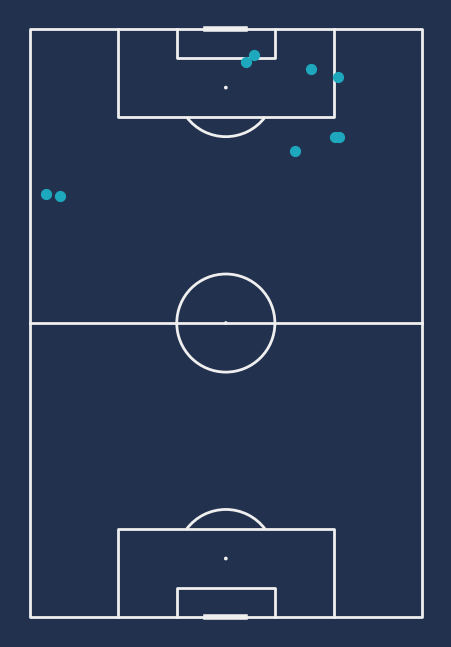

In [12]:
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#22314E', line_color='#efefef')
fig, ax = pitch.draw(figsize=(4.4, 6.4), constrained_layout=True, tight_layout=False)
fig.set_facecolor("#22314E")


pass_nodes = pitch.scatter(pressures_3.x, pressures_3.y,
                           s=50,
                           color='#1EA8BD', edgecolors='#1EA8BD', linewidth=1, alpha=1, ax=ax)
